In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn 
import math 
import scipy
import datetime 
import mlxtend
from statsmodels.formula.api import ols

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt
from scipy import stats

In [8]:
# read data
kc_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv', parse_dates = ['date'])

In [6]:
kcx = kc_data[['price']]
kcy = kc_data.drop('price', axis=1)

In [9]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


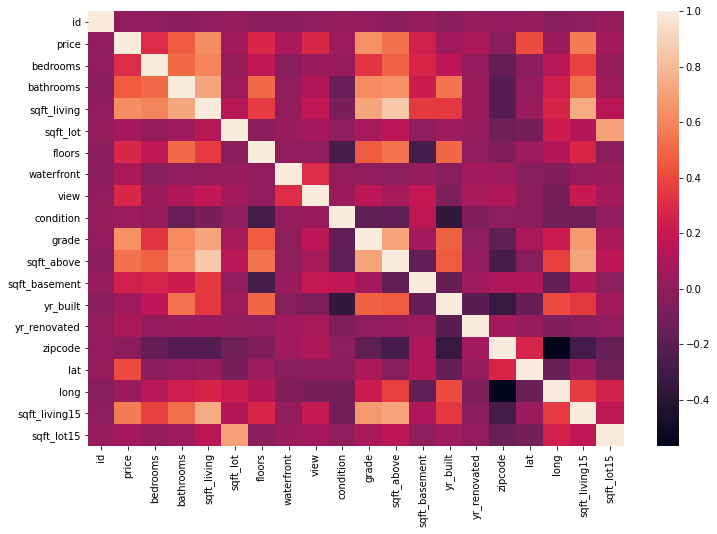

In [49]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()

In [50]:
#once you hit 2 bathrooms no bearing on price 
#only houses with a bed/bath ratio near the standard suggestion hit
#the highest in price, but outside of that doesn't seem to have much 
#bearing until you get to much larger houses which should cost more
#given size but don't because no one wants a 7bd 1bth 

In [51]:
#fitting our model by dropping features that dont do much & transforming others into 
#useful data points through multiplying them 
#removing homes with horrible bed to bath ratios 
kc_data['ratio_bd_bth'] = kc_data['bedrooms']/kc_data['bathrooms']
kc_data['sqft_abv_and_living'] = kc_data['sqft_above']*kc_data['sqft_living']
kc_data['sqft_15'] = kc_data['sqft_living15']*kc_data['sqft_lot15']
 


kc_data = kc_data.loc[kc_data['ratio_bd_bth'] < 4]
kc_data = kc_data.drop('date', axis=1)#.drop('sqft_above', axis=1).drop('id', axis=1)
#kc_data = kc_data.drop('sqft_living', axis=1).drop('sqft_basement', axis=1)

#reassign x & y 
kcx = kc_data[['price']]
kcy = kc_data.drop('price', axis=1)

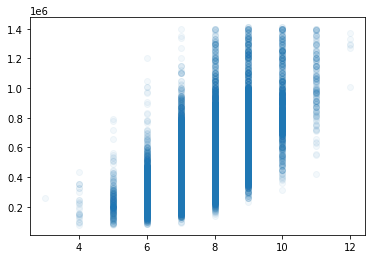

In [52]:
plt.scatter(kc_data['grade'], kcx, alpha=.05)

In [53]:
# initialize regression
reg = linear_model.LinearRegression()
# split data into 80/20 training/testing
x_train, x_test, y_train, y_test = train_test_split(kcx, kcy, test_size=0.2, random_state=42)

In [54]:
# train the model 
reg.fit(x_train, y_train)

LinearRegression()

In [55]:
# print test data predictions 
y_pred = reg.predict(x_test)
y_pred

array([[-7.29971391e+06,  3.44070229e+00,  2.22379864e+00, ...,
         1.66051673e+00,  4.72499533e+06,  3.05777544e+07],
       [-8.96515997e+06,  3.37892175e+00,  2.15101393e+00, ...,
         1.69296699e+00,  4.31015692e+06,  2.86816319e+07],
       [ 6.19616951e+06,  3.94133875e+00,  2.81360704e+00, ...,
         1.39755716e+00,  8.08662377e+06,  4.59429161e+07],
       ...,
       [-1.82839959e+07,  3.03323493e+00,  1.74375436e+00, ...,
         1.87453918e+00,  1.98897029e+06,  1.80720692e+07],
       [-1.33561704e+07,  3.21603505e+00,  1.95911431e+00, ...,
         1.77852332e+00,  3.21642002e+06,  2.36824345e+07],
       [-1.14486251e+07,  3.28679638e+00,  2.04247946e+00, ...,
         1.74135589e+00,  3.69156185e+06,  2.58541888e+07]])

In [56]:
# check accuracy with mean sq 
print(np.mean((y_pred - y_test)**2))

id                     1.451481e+18
bedrooms               6.856149e-01
bathrooms              3.794358e-01
sqft_living            3.540161e+05
sqft_lot               1.384236e+09
floors                 2.643621e-01
waterfront             3.167216e-03
view                   4.058228e-01
condition              4.101376e-01
grade                  6.477702e-01
sqft_above             3.760012e+05
sqft_basement          1.464410e+05
yr_built               8.395338e+02
yr_renovated           1.337191e+05
zipcode                2.908891e+03
lat                    1.666328e-02
long                   1.962319e-02
sqft_living15          2.640871e+05
sqft_lot15             4.739363e+08
ratio_bd_bth           2.921891e-01
sqft_abv_and_living    6.543089e+12
sqft_15                3.162025e+15
dtype: float64


In [57]:
# Define the problem
outcome = 'price'
x_cols = ['floors', 'waterfront', 'view',  'condition', 'grade', 
          'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
          'sqft_living15','sqft_lot15', 'sqft_abv_and_living', 'ratio_bd_bth']


In [58]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     3235.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:46:57   Log-Likelihood:            -2.6805e+05
No. Observations:               20312   AIC:                         5.361e+05
Df Residuals:                   20297   BIC:                         5.363e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.516e+06   1.94e+06     -4.392      0.000   -1.23e+07   -4.72e+06
floors               2.173e+04   2223.203      9.773      0.000    1.74e+04    2.61e+04
waterfront           1.773e+05   1.67e+04     10.630      0.000    1.45e+05     2.1e+05
view                 4.465e+04   1512.557     29.522      0.000    4.17e+04    4.76e+04
condition            3.414e+04   1560.390     21.877      0.000    3.11e+04    3.72e+04
grade                8.673e+04   1447.699     59.912      0.000    8.39e+04    8.96e+04
yr_built            -1909.1027     47.870    -39.881      0.000   -2002.931   -1815.275
yr_renovated           23.9882      2.725      8.803      0.000      18.647      29.330
zipcode              -287.5005     22.139    -12.986      0.000    -330.895    -244.106
lat                  5.662e+05   7055.963     80.242      0.000    5.52e+05     5.8e+05
long                -1.072e+05   8620.128    -12.432      0.000   -1.24e+05   -9.03e+04
sqft_living15          51.7316      2.425     21.329      0.000      46.978      56.486
sqft_lot15              0.0131      0.038      0.345      0.730      -0.061       0.088
sqft_abv_and_living     0.0194      0.001     38.677      0.000       0.018       0.020
ratio_bd_bth        -2.688e+04   1921.174    -13.992      0.000   -3.06e+04   -2.31e+04
==============================================================================
Omnibus:                     3408.969   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9290.764
Skew:                           0.910   Prob(JB):                         0.00
Kurtosis:                       5.769   Cond. No.                     1.07e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#remove non-significant features, basement size could be significant if we could get
#rid of the zeros, but as most people don't have basements i dont see how that'd be possible


outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_lot', 
          'floors', 'waterfront', 'view',  'condition', 'grade', 
          'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
X = kc_data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 23.015597853117562),
 ('bathrooms', 25.32823946972706),
 ('sqft_lot', 1.2182779857568944),
 ('floors', 13.95213410578075),
 ('waterfront', 1.1161459598322963),
 ('view', 1.2804344445012508),
 ('condition', 34.74764908830344),
 ('grade', 97.96906523053997),
 ('yr_built', 9567.100144522366),
 ('yr_renovated', 1.1477426883691397),
 ('zipcode', 1492649.0708985752),
 ('lat', 133555.58852508164),
 ('long', 1238949.83580145)]

In [21]:
fig = sm.graphics.qqplot(kc_data['long_zscore'], dist=stats.norm, line='45', fit=True)

NameError: name 'sm' is not defined

In [22]:
import statsmodels.api as sm
import scipy.stats as stats

In [23]:
kc_data['bedrooms'].sort_values(ascending=True)

6527      1
14631     1
3961      1
6496      1
8169      1
         ..
17703     9
16166     9
3913      9
18483    10
8390     11
Name: bedrooms, Length: 20312, dtype: int64

In [24]:
kc_data.loc[8182]

id                               424049043
date                   2014-08-11 00:00:00
price                               450000
bedrooms                                 9
bathrooms                              7.5
sqft_living                           4050
sqft_lot                              6504
floors                                   2
waterfront                               0
view                                     0
condition                                3
grade                                    7
sqft_above                            4050
sqft_basement                            0
yr_built                              1996
yr_renovated                             0
zipcode                              98144
lat                                47.5923
long                              -122.301
sqft_living15                         1448
sqft_lot15                            3866
ratio_bd_bth                           1.2
sqft_abv_and_living               16402500
sqft_15    

In [25]:
kc_columns =  kc_data[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'sqft_abv_and_living', 'grade_zscore']].copy()
x_cols = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'sqft_abv_and_living', 'grade_zscore']

KeyError: "['grade_zscore'] not in index"

ValueError: x and y must have same first dimension, but have shapes (20312,) and (19,)

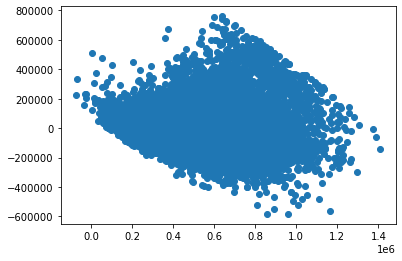

In [26]:
plt.scatter(model.predict(kc_data), model.resid)
plt.plot(model.predict(kc_data), [0 for i in range(len(kc_columns))])

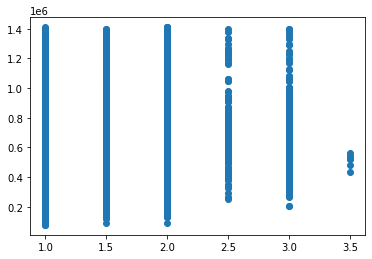

In [27]:
plt.scatter(kc_data['floors'], kcx)
#should we keep?

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Trying KNN
# maybe try 60% train , 20% adj, 20% test?
cv = KFold(n_splits=10)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
k_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=5)

TypeError: invalid type promotion

In [30]:

vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for val in vals:
    features = abs(kc_data.corr())['price'][abs(kc_data.corr()['price'])>val].drop('price').index.tolist()
    
    x = kc_data.drop(columns='price')
    x = x[features]
    kcy = kc_data['price'].copy()
    
    y_pred = cross_val_predict(classifier_pipeline, x, kcy, cv=cv)
    
    print(features)
    print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
    print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'ratio_bd_bth', 'sqft_abv_and_living', 'sqft_15']
RMSE:  117820.71
R Squared: 0.75
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'ratio_bd_bth', 'sqft_abv_and_living']
RMSE:  118922.8
R Squared: 0.74
['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'sqft_abv_and_living']
RMSE:  119988.47
R Squared: 0.74
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'sqft_abv_and_living']
RMSE:  118739.54
R Squared: 0.74
['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_abv_and_living']
RMSE:  167468.53
R Squared: 0.49
['sqft_living', 'grade']
RMSE:  176430.12
R Squared: 0.43


In [31]:
# Define the problem
outcome = 'price'
x_cols = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'sqft_abv_and_living', 'grade_zscore']

In [42]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_data).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'grade_zscore' is not defined
    price~bathrooms+sqft_living+grade+sqft_above+lat+sqft_living15+sqft_abv_and_living+grade_zscore
                                                                                       ^^^^^^^^^^^^

In [35]:
kc_data['lat'].sort_values()

3148     47.1559
12489    47.1622
12160    47.1647
7384     47.1764
385      47.1775
          ...   
5798     47.7775
6529     47.7775
291      47.7776
16759    47.7776
15124    47.7776
Name: lat, Length: 20312, dtype: float64

In [36]:
for col in kc_columns:
    col_zscore = col + '_zscore'
    kc_data[col_zscore] = (kc_data[col] - kc_data[col].mean())/kc_data[col].std(ddof=0)

In [37]:
kc_columns = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'sqft_abv_and_living', 'grade_zscore']

for column in kc_columns:
    kc_data = kc_data.loc[kc_data[column] < 3]
    kc_data = kc_data.loc[kc_data[column] > (-3)]

In [38]:
for col in kc_columns:
    kc_data.drop(col, 1, inplace=True)

In [39]:
#kc_data['bathrooms'].sort_values()

In [40]:

from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [41]:
clf.fit(x_train, y_train)

TypeError: invalid type promotion